![image](fluke_definition.png)

## AI Innovation House
 * [ ] [True Size of Africa](https://matadornetwork.com/read/true-size-africa/)
 * [ ] [What You See Is What You Don't Get](https://thetruesize.com/)
 * [ ] [Vision and Language Transformer](https://huggingface.co/spaces/nielsr/vilt-vqa)

In [1]:
%reload_ext watermark
%watermark -uniz --author "Prayson W. Daniel & Shahnoza Bekbulaeva" -vm -p pandas,numpy,matplotlib,scikit-learn,transformers

Author: Prayson W. Daniel & Shahnoza Bekbulaeva

Last updated: 2022-02-09T20:36:26.082319+01:00

Python implementation: CPython
Python version       : 3.8.12
IPython version      : 8.0.1

pandas      : 1.4.0
numpy       : 1.22.2
matplotlib  : 3.5.1
scikit-learn: 1.0.2
transformers: 4.16.2

Compiler    : GCC 9.3.0
OS          : Linux
Release     : 5.10.16.3-microsoft-standard-WSL2
Machine     : x86_64
Processor   : x86_64
CPU cores   : 12
Architecture: 64bit



In [2]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [3]:
import numpy as np
import pandas as pd

In [4]:
DATA_URI = "https://raw.githubusercontent.com/AlessandroGianfelici/danish_reviews_dataset/master/raw_data.txt"

In [5]:
dataf = pd.read_csv(DATA_URI, usecols=["review_text", "review_stars"])

with pd.option_context('display.max_colwidth', None):
  display(dataf.sample(3, random_state=666))


,review_text,review_stars
8274,"Lyn hurtigt, effektivt og flot resultat",5
31870,"Selv brændt plastikhår er bedre kvalitet end deres ""ægte luksus remy extensions"".\n\nJeg skriver for at brokke mig, da jeg har været extensions bruger igennem 8 år & kun 1 gang før har oplevet så dårlig kvalitet som denne. Forrige leverandør jeg modtog sending fra beklagede selvfølgelig meget & sendte en ny sending uden beregning, som var langt bedre. \n\nMEN PHURE DERIMOD begynder at skyde skylden på mig, hvordan jeg behandler håret mv. Når jeg pænt forklarer at jeg altså er uddannet frisør, selv har påsat extensions i min frisørsalon & været extensions bruger igennem 8 år & derfor godt ved hvordan man bør passe & pleje extensions, stopper de så med at svare.\n\nJeg kunne inden steder i mine mails finde et ordrenummer jeg kunne referere til heller. Jeg sidder nu med en stor gang plastikkrus, som jeg har betalt 1.200 Kr. for & som jeg hver dag skal bruge oceaner af tid på, for at det kan se nogenlunde anstændigt ud. \n\nVirkelig dårlig service!",1
16862,Fremragende.,5


In [6]:
(
    dataf
     .groupby(by=["review_stars"])
     .nunique()
     .sort_values(by="review_text", ascending=False)
     .rename(columns={"review_text": "review_count"})
     
)

,review_count
review_stars,
5,27945
1,8437
4,3170
2,1428
3,1172


In [7]:
(
    dataf
     .assign(sentiment = np.where(dataf["review_stars"].gt(3), 1, 0))
     .sample(10, random_state=42)
)

,review_text,review_stars,sentiment
19150,Dejligt man kan købe den rigtig størrelse når ...,5,1
6194,"nem hjemmeside, gode priser og hurtig levering",5,1
35684,"Har købt nærmest alt indenfor Bitz, da vi syne...",1,0
27361,Det var lige i skabet uden problemer. Super se...,5,1
35906,På forsiden af ugens reklame kunne man se at d...,2,0
21593,cpsms.dk leverer virkelig varen til en rigtig ...,5,1
26842,Det let at bestille og det hele godkendt inden...,5,1
14782,Super service og en rigtig god snak,5,1
11878,"God service og hurtig levering, jeg er fuldti...",5,1
6237,Top glasses fast delivery,5,1


In [8]:
datat = (
            dataf
             .assign(sentiment = np.where(dataf["review_stars"].gt(3), 1, 0))
             # .sample(10, random_state=42)
    )

In [9]:
RANDOM_STATE = 42
(datat
     .assign(sentiment = np.where(dataf["review_stars"].gt(3), 1, 0))
     .sample(100, random_state=RANDOM_STATE)
     .index
)

Int64Index([19150,  6194, 35684, 27361, 35906, 21593, 26842, 14782, 11878,
             6237,  6366,  3933, 29534, 18636, 37134, 24775, 37485, 40922,
             7175, 41691, 27394, 43722, 41440,  9060, 33017, 37800,  6234,
            33131,  6244, 31033, 18094, 18491,   343, 11029, 33301, 19858,
             8541, 33348, 38990, 43832,   884,  2189, 33357, 42644, 11260,
            39990, 32610,  2746, 35265, 23420, 17792,   116, 13267, 42476,
            33393, 23068, 33157, 14600, 42026, 13956, 27984, 18578, 21954,
            12824, 11601, 24128, 31151, 22795, 37287, 14831, 32553, 15220,
            39947, 38222,  5525, 43567, 36585, 29395, 20196, 34174, 16504,
            12006, 23679,  4165,  4859,  3858, 19227, 32277, 23076, 26084,
             1673,  9162, 25704, 43924, 30777, 30827, 40119, 18237, 41948,
            17649],
           dtype='int64')

In [10]:
test_data_index = (datat
     .sample(100, random_state=RANDOM_STATE)
     .index
)

In [11]:
validation_data = datat.loc[test_data_index]

In [12]:
data = datat[~datat.index.isin(test_data_index)]

data.sample(5, random_state=42)

,review_text,review_stars,sentiment
10708,3. gang jeg leaser hos BMC. Intet negativt at ...,5,1
8164,Har ringet til jer 5 gange INDE i telefon tide...,4,1
19599,Vi har aldrig problemer med noget af det YouSe...,5,1
2533,Fuldt ud tilfreds!\n\nJeg har bestilt varer he...,5,1
25833,Vældigt god oplevelse med indlyttende og dygti...,5,1


In [13]:
(
    data[["sentiment"]]
     .value_counts()
     .rename(index ={0: "negative", 1:"positive"})
     .to_frame(name="observations")
     
)

,observations
sentiment,
positive,32958
negative,11027


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier

In [15]:
X, y = data["review_text"], data["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=.9, 
                                                    random_state=42, 
                                                    stratify=y
                                                   )

In [16]:
print(f"{color.BOLD}{color.BLUE}Training Data /dɪstrɪˈbjuːʃ(ə)n/{color.END}") 
y_train.value_counts(normalize=True).to_frame().rename(index ={0: "negative", 1:"positive"})

Training Data /dɪstrɪˈbjuːʃ(ə)n/


,sentiment
positive,0.749305
negative,0.250695


In [17]:
print(f"{color.BOLD}{color.BLUE}Test Data /dɪstrɪˈbjuːʃ(ə)n/") 
y_test.value_counts(normalize=True).to_frame().rename(index ={0: "negative", 1:"positive"})

Test Data /dɪstrɪˈbjuːʃ(ə)n/


,sentiment
positive,0.749261
negative,0.250739


In [18]:
import re
def tokenizer(blob, stop_words=None, remove_digits=True):

    if stop_words is None:
        stop_words = {}
    
    blob = blob.lower()
    
     # eyes [nose] mouth | mouth [nose] eyes pattern
    emoticons = r"(?:[<>]?[:;=8][\-o\*\']?[\)\]\(\[dDpP/\:\}\{@\|\\]|[\)\]\(\[dDpP/\:\}\{@\|\\][\-o\*\']?[:;=8][<>]?)"
    emoticon_re = re.compile(emoticons, re.VERBOSE | re.I | re.UNICODE)
    
    text = re.sub(r'[\W]+', ' ', blob)
    
    # remove 3+ repetitive characters i.e. hellllo -> hello, jaaaa -> jaa 
    repetitions = re.compile(r'(.)\1{2,}')
    text = repetitions.sub(r'\1\1', text)
    
    # remove 2+ repetitive words e.g. hej hej hej -> hej
    
    repetitions = re.compile(r'\b(\w+)\s+(\1\s*)+\b')
    text = repetitions.sub(r'\1 ', text)
    
    
    emoji = ''.join(re.findall(emoticon_re, blob))
    
       
    # remove stopwords
    if stop_words:
        text = [word for word in text.split() if word not in stop_words]
    

    
    if remove_digits:
        text = re.sub(r'\b\d+\b', '', text)
    

    # remove extra spaces
    text = ' '.join(text.split())
    result = f'{text} {emoji}'.encode('utf-8').decode('utf-8')
       
    
    return result.split()

In [19]:
model = Pipeline(
    [
        ("tfidf", TfidfVectorizer(tokenizer=tokenizer, token_pattern=None, ngram_range=(1,2))),
        ("clf", SGDClassifier(loss="log")),
    ] 
)

In [20]:
%%time
model.fit(X_train, y_train)

CPU times: user 10.2 s, sys: 1.43 s, total: 11.6 s
Wall time: 10.5 s


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(ngram_range=(1, 2), token_pattern=None,
                                 tokenizer=<function tokenizer at 0x7efd5888f0d0>)),
                ('clf', SGDClassifier(loss='log'))])

In [21]:
model.score(X_test, y_test)

0.9281654921573085

In [22]:
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

 Unconfused Confusion Matrix


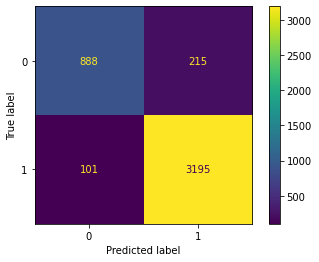

In [24]:
print(f"{color.BOLD}{color.DARKCYAN} Unconfused Confusion Matrix") 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(f"{color.BOLD}{color.BLUE} ✔️ Classification Report{color.END}{color.GREEN}") 
print(classification_report(y_test, y_pred, target_names=["negative", "positive"]))

 ✔️ Classification Report
              precision    recall  f1-score   support

    negative       0.90      0.81      0.85      1103
    positive       0.94      0.97      0.95      3296

    accuracy                           0.93      4399
   macro avg       0.92      0.89      0.90      4399
weighted avg       0.93      0.93      0.93      4399



In [27]:
(
    validation_data
    .assign(score = lambda d: model.predict(d["review_text"]))
    .sample(10)
)

,review_text,review_stars,sentiment,score
29395,Jeg har på F24 tankområde på HP Hansensgade i ...,1,0,0
20196,"Fantastisk service, hurtig levering, dansk kva...",5,1,1
37134,Super service og hurtig forsendelse. Tak!,5,1,1
6234,Helt igennem dårlig .\nJeg har returneret vare...,1,0,0
11878,"God service og hurtig levering, jeg er fuldti...",5,1,1
11029,Hurtig levering til billig pris og pænt arbejde,5,1,1
33017,"Som flere oplever, meget dårlig beskrevne effe...",1,0,1
2746,"En rigtig dejlig og hyggelig sted at spille, d...",5,1,1
29534,Pakken kom 1 dag for sent end forventet i følg...,1,0,1
23076,Har aldrig været utilfreds med Jysk :),5,1,1


In [28]:
(
    validation_data
    .assign(score = lambda d: model.predict(d["review_text"]))
    .loc[lambda d: d["sentiment"].ne(d["score"])]
)

,review_text,review_stars,sentiment,score
19150,Dejligt man kan købe den rigtig størrelse når ...,5,1,0
29534,Pakken kom 1 dag for sent end forventet i følg...,1,0,1
33017,"Som flere oplever, meget dårlig beskrevne effe...",1,0,1
37800,"Igennem vores boligjagt, har vi været til mang...",1,0,1
43832,Jeg gik ind på deres hjemmeside for at bestill...,5,1,0
33393,"Prisen er god, og bestilte derfor 2 par sko ti...",1,0,1
13956,"Medarbejderne knokler, der er alt for få til a...",2,0,1
37287,Jeg er fint tilfreds med POWER og deres meget ...,3,0,1
32553,"Manglende udvikling af mobilbank. JyskeBanks ""...",1,0,1
26084,Kørte på motorvejen ved Horsens og fik en fejl...,5,1,0


In [29]:
(
    validation_data
    .assign(score = lambda d: model.predict(d["review_text"]))
    .loc[lambda d: d["sentiment"].ne(d["score"])]
    .assign(score_probability = lambda d: model.predict_proba(d["review_text"])[:, 1])
)

,review_text,review_stars,sentiment,score,score_probability
19150,Dejligt man kan købe den rigtig størrelse når ...,5,1,0,0.486975
29534,Pakken kom 1 dag for sent end forventet i følg...,1,0,1,0.754802
33017,"Som flere oplever, meget dårlig beskrevne effe...",1,0,1,0.586029
37800,"Igennem vores boligjagt, har vi været til mang...",1,0,1,0.592670
43832,Jeg gik ind på deres hjemmeside for at bestill...,5,1,0,0.490396
33393,"Prisen er god, og bestilte derfor 2 par sko ti...",1,0,1,0.502360
13956,"Medarbejderne knokler, der er alt for få til a...",2,0,1,0.518476
37287,Jeg er fint tilfreds med POWER og deres meget ...,3,0,1,0.576190
32553,"Manglende udvikling af mobilbank. JyskeBanks ""...",1,0,1,0.576307
26084,Kørte på motorvejen ved Horsens og fik en fejl...,5,1,0,0.282306


In [30]:
(
    validation_data
    .assign(score = lambda d: model.predict(d["review_text"]))
    .assign(score_probability = lambda d: model.predict_proba(d["review_text"])[:, 1])
    .loc[lambda d: d["score_probability"].between(0.4, 0.6)]
)

,review_text,review_stars,sentiment,score,score_probability
19150,Dejligt man kan købe den rigtig størrelse når ...,5,1,0,0.486975
41440,Skulle have en Office licens. \nSmartworld hav...,5,1,1,0.500911
33017,"Som flere oplever, meget dårlig beskrevne effe...",1,0,1,0.586029
37800,"Igennem vores boligjagt, har vi været til mang...",1,0,1,0.592670
43832,Jeg gik ind på deres hjemmeside for at bestill...,5,1,0,0.490396
35265,Færdig med at vente 🙂\nFinder min oprindelige ...,1,0,0,0.453490
33393,"Prisen er god, og bestilte derfor 2 par sko ti...",1,0,1,0.502360
13956,"Medarbejderne knokler, der er alt for få til a...",2,0,1,0.518476
37287,Jeg er fint tilfreds med POWER og deres meget ...,3,0,1,0.576190
32553,"Manglende udvikling af mobilbank. JyskeBanks ""...",1,0,1,0.576307


In [31]:
model.named_steps["clf"].coef_[0]

array([ 0.0175252 , -0.01991192, -0.00149128, ..., -0.06068244,
        0.01043657,  0.01043657])

In [32]:
model.named_steps["tfidf"].get_feature_names_out()

array(['(-:', '(8', '(8:-)', ..., 'øøvv', 'жre', 'жre medlem'],
      dtype=object)

In [33]:
explain = (
        pd
            .DataFrame({"score":model.named_steps["clf"].coef_[0]},
                       index = model.named_steps["tfidf"].get_feature_names_out()
            )
            .sort_values(by="score")
)

In [34]:
explain.tail(5)

,score
service,3.772958
og,3.910210
hurtig,5.012131
super,5.413090
god,5.858131


In [35]:
explain.head(5)

,score
ikke,-10.055054
dårlig,-5.888686
at,-3.923793
men,-3.880141
aldrig,-3.474937


In [36]:
(
    validation_data
    .assign(score = lambda d: model.predict(d["review_text"]))
    .loc[lambda d: d["sentiment"].ne(d["score"])]
    .assign(score_probability = lambda d: model.predict_proba(d["review_text"])[:, 1])
    .loc[lambda d: (d["score"].eq(0) & d["score_probability"].lt(.4))]
    # .loc[lambda d: (d["score"].eq(1) & d["score_probability"].gt(.6))]
)

,review_text,review_stars,sentiment,score,score_probability
26084,Kørte på motorvejen ved Horsens og fik en fejl...,5,1,0,0.282306


In [37]:
message = (
    validation_data
    .assign(score = lambda d: model.predict(d["review_text"]))
    .loc[lambda d: d["sentiment"].ne(d["score"])]
    .assign(score_probability = lambda d: model.predict_proba(d["review_text"])[:, 1])
    .loc[lambda d: (d["score"].eq(0) & d["score_probability"].lt(.4))]
    # .loc[lambda d: (d["score"].eq(1) & d["score_probability"].gt(.6))]
)["review_text"].squeeze()

In [38]:
message

'Kørte på motorvejen ved Horsens og fik en fejl på motoren. Jeg ringede og de lovede akut at sætte en tester på for at udlæse fejl. Det gjorde de, fin service, men desværre blokerede en leverandørlastbil så bilen ikke kunne komme ud af værkstedet. Det var jo ikke RAF’s skyld, men fordi jeg måtte vente 20-25 minutter ønskede de ikke betaling. Her kommer jeg gerne igen.'

In [39]:
from translate import translator
# !rm -rf models

[+] Loading model from models/facebook/m2m100_418M
[+] Model loaded in cpu complete
[+] Loading completed


In [40]:
translator(text=message[:message.find(".") + 1], src_lang="da", target_lang="en")

'I was on the motorway at Horsens and had a motor error.'

In [41]:
translator(text=message, src_lang="da", target_lang="en")

"I called and they promised urgently to put a test on to read errors. They did, good service, but unfortunately blocked a supplier truck so the car could not get out of the workshop. It was not RAF's fault, but because I had to wait 20-25 minutes they didn't want payment. Here I'm happy to come back."

In [42]:
explain[explain.index.isin(pd.Index(tokenizer(message)))]

,score
ikke,-10.055054
at,-3.923793
men,-3.880141
på,-3.456884
de,-2.987133
for,-2.747599
af,-1.856528
så,-1.629665
det,-1.217627
desværre,-1.176604


In [43]:
1/(1 + np.exp((explain[explain.index.isin(pd.Index(tokenizer(message)))].sum() + model.named_steps["clf"].intercept_[0]).squeeze()))

0.9999999999956788

In [44]:
model.named_steps["clf"].intercept_[0]

1.5110876855729565

In [45]:
model.predict_proba([""])

array([[0.18077765, 0.81922235]])

In [46]:
# From the example, I can deduce that input is easy for human but will be a challenge for any model

## Neither Hisia (trained with more similiar examples) or Transformer model pass the test

In [47]:
import sys
!{sys.executable} -m pip install hisia --quiet

You should consider upgrading via the '/home/pwd/.cache/pypoetry/virtualenvs/sentiment-P4Pxa7t2-py3.8/bin/python -m pip install --upgrade pip' command.


In [48]:
import hisia
hisia.Hisia(message)

Sentiment(sentiment=negative, positive_probability=0.407, negative_probability=0.593)

![transformers](transformer.png "Not even Transformers")

In [49]:
## Just curious
# hisia.Hisia("det er ikke ok")

# model.predict_proba(["det er ikke ok"]) # 0 - negative, 1 - positive

In [50]:
# This led us to the next. What predictions we might have got correct by fluke?

In [51]:
LOWER_BOUND, UPPER_BOUND = 0.35, 0.65
(
    validation_data
    .assign(score_probability = lambda d: model.predict_proba(d["review_text"])[:, 1],
            score = lambda d: np.where(d["score_probability"].gt(.5), 1, 0))
    .loc[lambda d: (d["score_probability"].gt(LOWER_BOUND) & d["score_probability"].lt(UPPER_BOUND))]
    .sort_values(by="score_probability")
)

,review_text,review_stars,sentiment,score_probability,score
343,Den ene af to bøger ankom med tydelige ‘slåede...,2,0,0.365700,0
15220,"Jeg har handlet af to omgange, gennem butikken...",3,0,0.415163,0
35265,Færdig med at vente 🙂\nFinder min oprindelige ...,1,0,0.453490,0
19150,Dejligt man kan købe den rigtig størrelse når ...,5,1,0.486975,0
43832,Jeg gik ind på deres hjemmeside for at bestill...,5,1,0.490396,0
41440,Skulle have en Office licens. \nSmartworld hav...,5,1,0.500911,1
33393,"Prisen er god, og bestilte derfor 2 par sko ti...",1,0,0.502360,1
13956,"Medarbejderne knokler, der er alt for få til a...",2,0,0.518476,1
25704,Yousee er en pengemaskine og tænker ikke på an...,1,0,0.522455,1
37287,Jeg er fint tilfreds med POWER og deres meget ...,3,0,0.576190,1


In [52]:
# before diving in, let elimate the problem with models

from sklearn.ensemble import ExtraTreesClassifier

In [53]:
et = Pipeline(
    [
        ("tfidf", TfidfVectorizer(tokenizer=tokenizer, token_pattern=None, ngram_range=(1,2))),
        ("clf", ExtraTreesClassifier(random_state=42, n_jobs=-1)),
    ] 
).fit(X_train, y_train)

print(classification_report(y_test, et.predict(X_test), target_names=["negative", "positive"]))

              precision    recall  f1-score   support

    negative       0.91      0.73      0.81      1103
    positive       0.92      0.97      0.94      3296

    accuracy                           0.91      4399
   macro avg       0.91      0.85      0.88      4399
weighted avg       0.91      0.91      0.91      4399



In [54]:
LOWER_BOUND, UPPER_BOUND = 0.35, 0.65
(
    validation_data
    .assign(score_probability = lambda d: et.predict_proba(d["review_text"])[:, 1],
            score = lambda d: np.where(d["score_probability"].gt(.5), 1, 0))
    .loc[lambda d: (d["score_probability"].gt(LOWER_BOUND) & d["score_probability"].lt(UPPER_BOUND))]
    .sort_values(by="score_probability")
)

,review_text,review_stars,sentiment,score_probability,score
35906,På forsiden af ugens reklame kunne man se at d...,2,0,0.36,0
36585,Bestilte støvsugerslange til min miele\nInden ...,1,0,0.39,0
35684,"Har købt nærmest alt indenfor Bitz, da vi syne...",1,0,0.41,0
26084,Kørte på motorvejen ved Horsens og fik en fejl...,5,1,0.49,0
33393,"Prisen er god, og bestilte derfor 2 par sko ti...",1,0,0.50,0
30777,Blev kontaktet af lotto 365 om jeg vil med i e...,1,0,0.51,1
24775,Må desværre også melde ind at man skal være yd...,1,0,0.52,1
343,Den ene af to bøger ankom med tydelige ‘slåede...,2,0,0.54,1
27984,Rigtig venlig kundeservice.\nRåd og vejledning...,5,1,0.55,1
37800,"Igennem vores boligjagt, har vi været til mang...",1,0,0.58,1


In [55]:
import time
from sklearn.linear_model import PassiveAggressiveClassifier, Perceptron, LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB

In [56]:
classifiers = {
    "Perceptron": Perceptron(n_jobs=-1),
    "NBMultinomial": MultinomialNB(alpha=1e-2,),
    "PassiveAggressive": PassiveAggressiveClassifier(n_jobs=-1),
    "LogisticRegression": LogisticRegressionCV(cv=5, n_jobs=-1, max_iter=5e3), #takes long to train
}

trained_classifiers = {}

for clf, model in classifiers.items():
    print(f"Training {clf}")
    start_time = time.perf_counter()
    m = Pipeline(
                [
                    ("tfidf", TfidfVectorizer(tokenizer=tokenizer, token_pattern=None, ngram_range=(1,2))),
                    ("clf", model),
                ] 
        ).fit(X_train, y_train)
    
    print(f"Training completed in {time.perf_counter() - start_time : .2f} seconds")
    
    
    print(classification_report(y_test, m.predict(X_test), target_names=["negative", "positive"]))
    trained_classifiers[clf] = m
    
    
    

Training Perceptron
Training completed in  9.50 seconds
              precision    recall  f1-score   support

    negative       0.92      0.89      0.90      1103
    positive       0.96      0.97      0.97      3296

    accuracy                           0.95      4399
   macro avg       0.94      0.93      0.94      4399
weighted avg       0.95      0.95      0.95      4399

Training NBMultinomial
Training completed in  9.46 seconds
              precision    recall  f1-score   support

    negative       0.85      0.95      0.90      1103
    positive       0.98      0.94      0.96      3296

    accuracy                           0.94      4399
   macro avg       0.92      0.95      0.93      4399
weighted avg       0.95      0.94      0.95      4399

Training PassiveAggressive
Training completed in  9.57 seconds
              precision    recall  f1-score   support

    negative       0.92      0.92      0.92      1103
    positive       0.97      0.97      0.97      3296

    

In [57]:
# poetry add torch --platform linux --python "^3.8" -vvv

In [58]:
LOWER_BOUND, UPPER_BOUND = 0.35, 0.65
(
    validation_data
    .assign(score_probability = lambda d: trained_classifiers["LogisticRegression"].predict_proba(d["review_text"])[:, 1],
            score = lambda d: np.where(d["score_probability"].gt(.5), 1, 0))
    .loc[lambda d: (d["score_probability"].gt(LOWER_BOUND) & d["score_probability"].lt(UPPER_BOUND))]
    .sort_values(by="score_probability")
)

,review_text,review_stars,sentiment,score_probability,score
19150,Dejligt man kan købe den rigtig størrelse når ...,5,1,0.474867,0


In [59]:
lr = trained_classifiers["LogisticRegression"]
(
    validation_data
    .assign(score = lambda d: lr.predict(d["review_text"]))
    .loc[lambda d: d["sentiment"].ne(d["score"])]
    .assign(score_probability = lambda d: lr.predict_proba(d["review_text"])[:, 1])
    # .loc[lambda d: (d["score"].eq(0) & d["score_probability"].lt(.45))]
    # .loc[lambda d: (d["score"].eq(1) & d["score_probability"].gt(.6))]
)

,review_text,review_stars,sentiment,score,score_probability
19150,Dejligt man kan købe den rigtig størrelse når ...,5,1,0,0.474867
29534,Pakken kom 1 dag for sent end forventet i følg...,1,0,1,0.999016
41440,Skulle have en Office licens. \nSmartworld hav...,5,1,0,0.323868
37800,"Igennem vores boligjagt, har vi været til mang...",1,0,1,0.970020
37287,Jeg er fint tilfreds med POWER og deres meget ...,3,0,1,0.995818
26084,Kørte på motorvejen ved Horsens og fik en fejl...,5,1,0,0.018770


In [60]:
lr.predict_proba([message])

array([[0.98122975, 0.01877025]])